In [1]:
import pandas as pd
df = pd.read_csv('../input/dessert1/Data_Train1.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Distance
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1710
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1841
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2672
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1876
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1744
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,1547
10678,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,1547
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,1710
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1710


In [2]:
df.shape

(10682, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Distance         10682 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1001.6+ KB


In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
df.describe()

,Price,Distance
count,10682.000000,10682.000000
mean,9087.214567,2070.143981
std,4611.548810,582.281566
min,1759.000000,624.000000
25%,5277.000000,1710.000000
50%,8372.000000,2203.000000
75%,12373.000000,2279.000000
max,79512.000000,4431.000000


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Distance           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

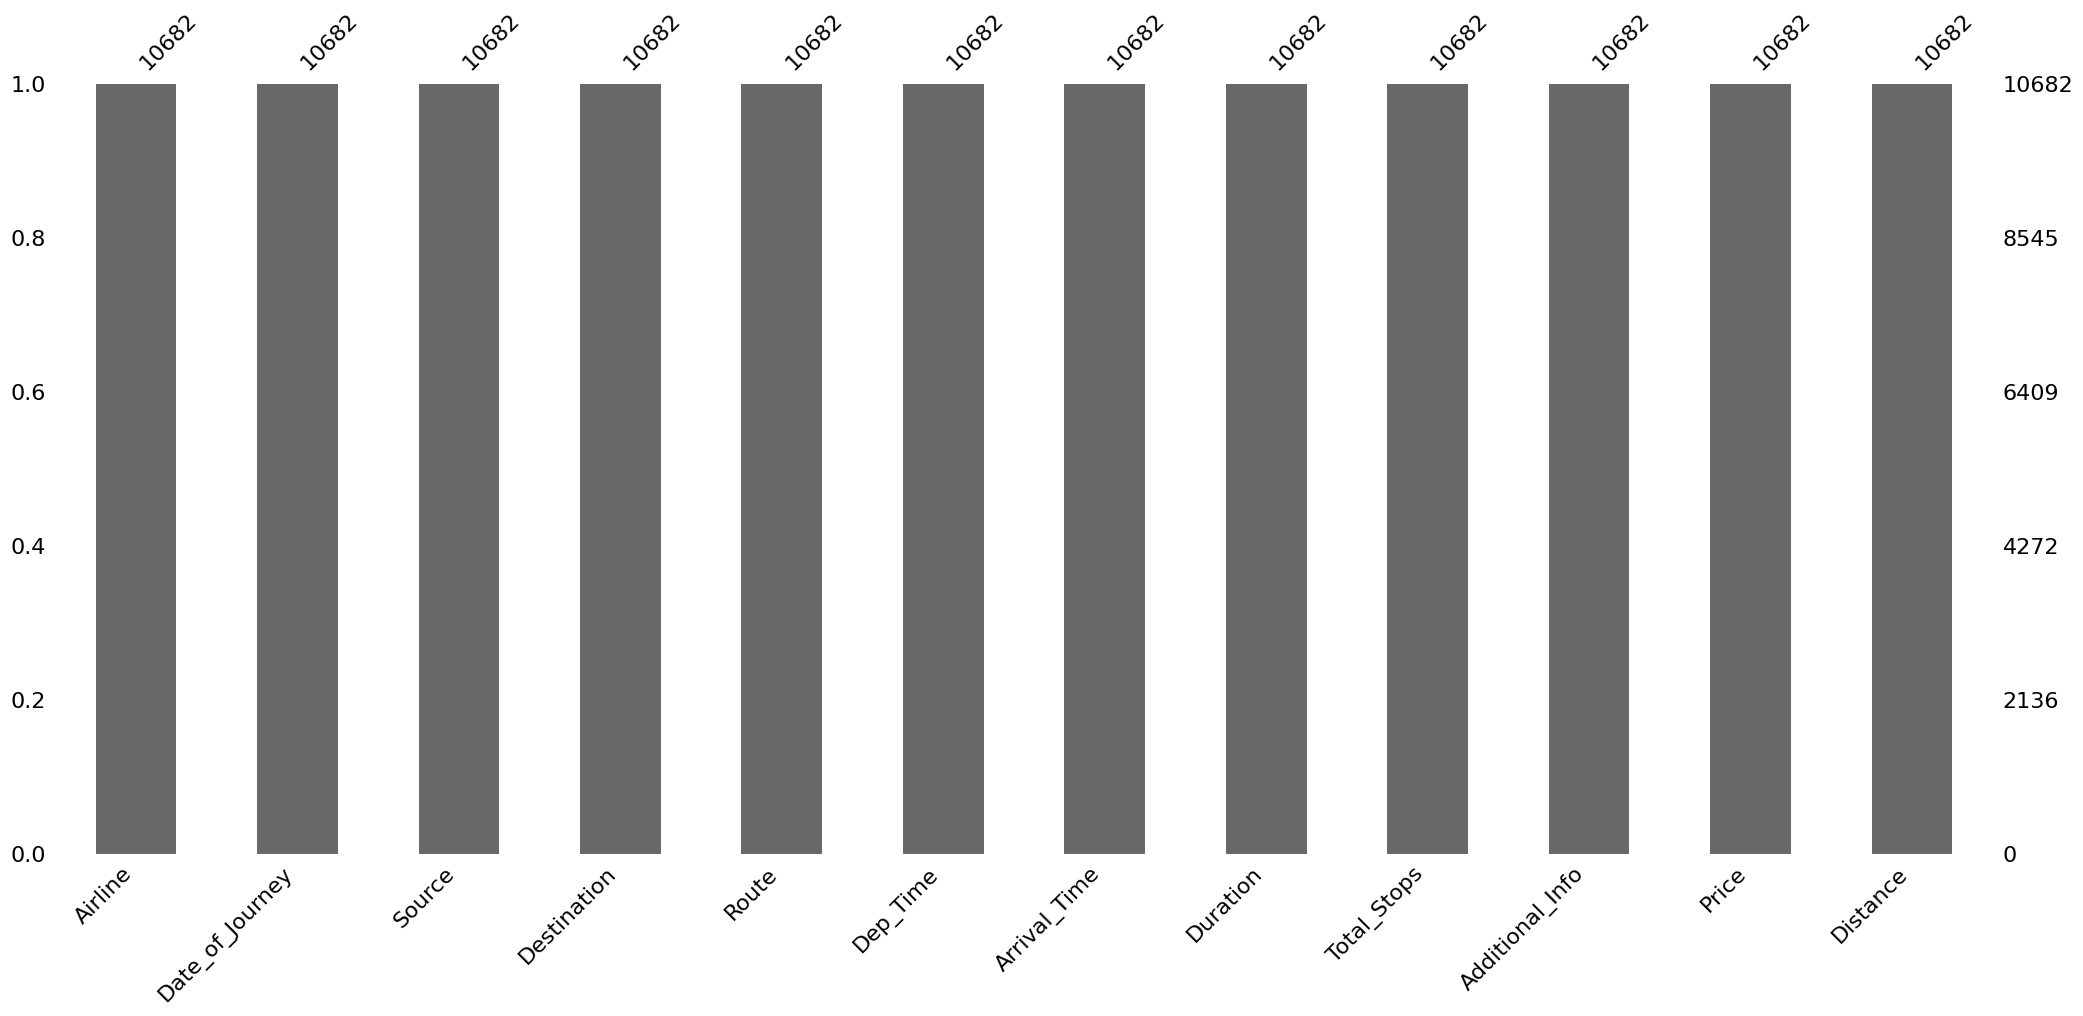

In [7]:
import missingno as msno
msno.bar(df)
plt.show

In [8]:
df.dropna(inplace=True)

In [9]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

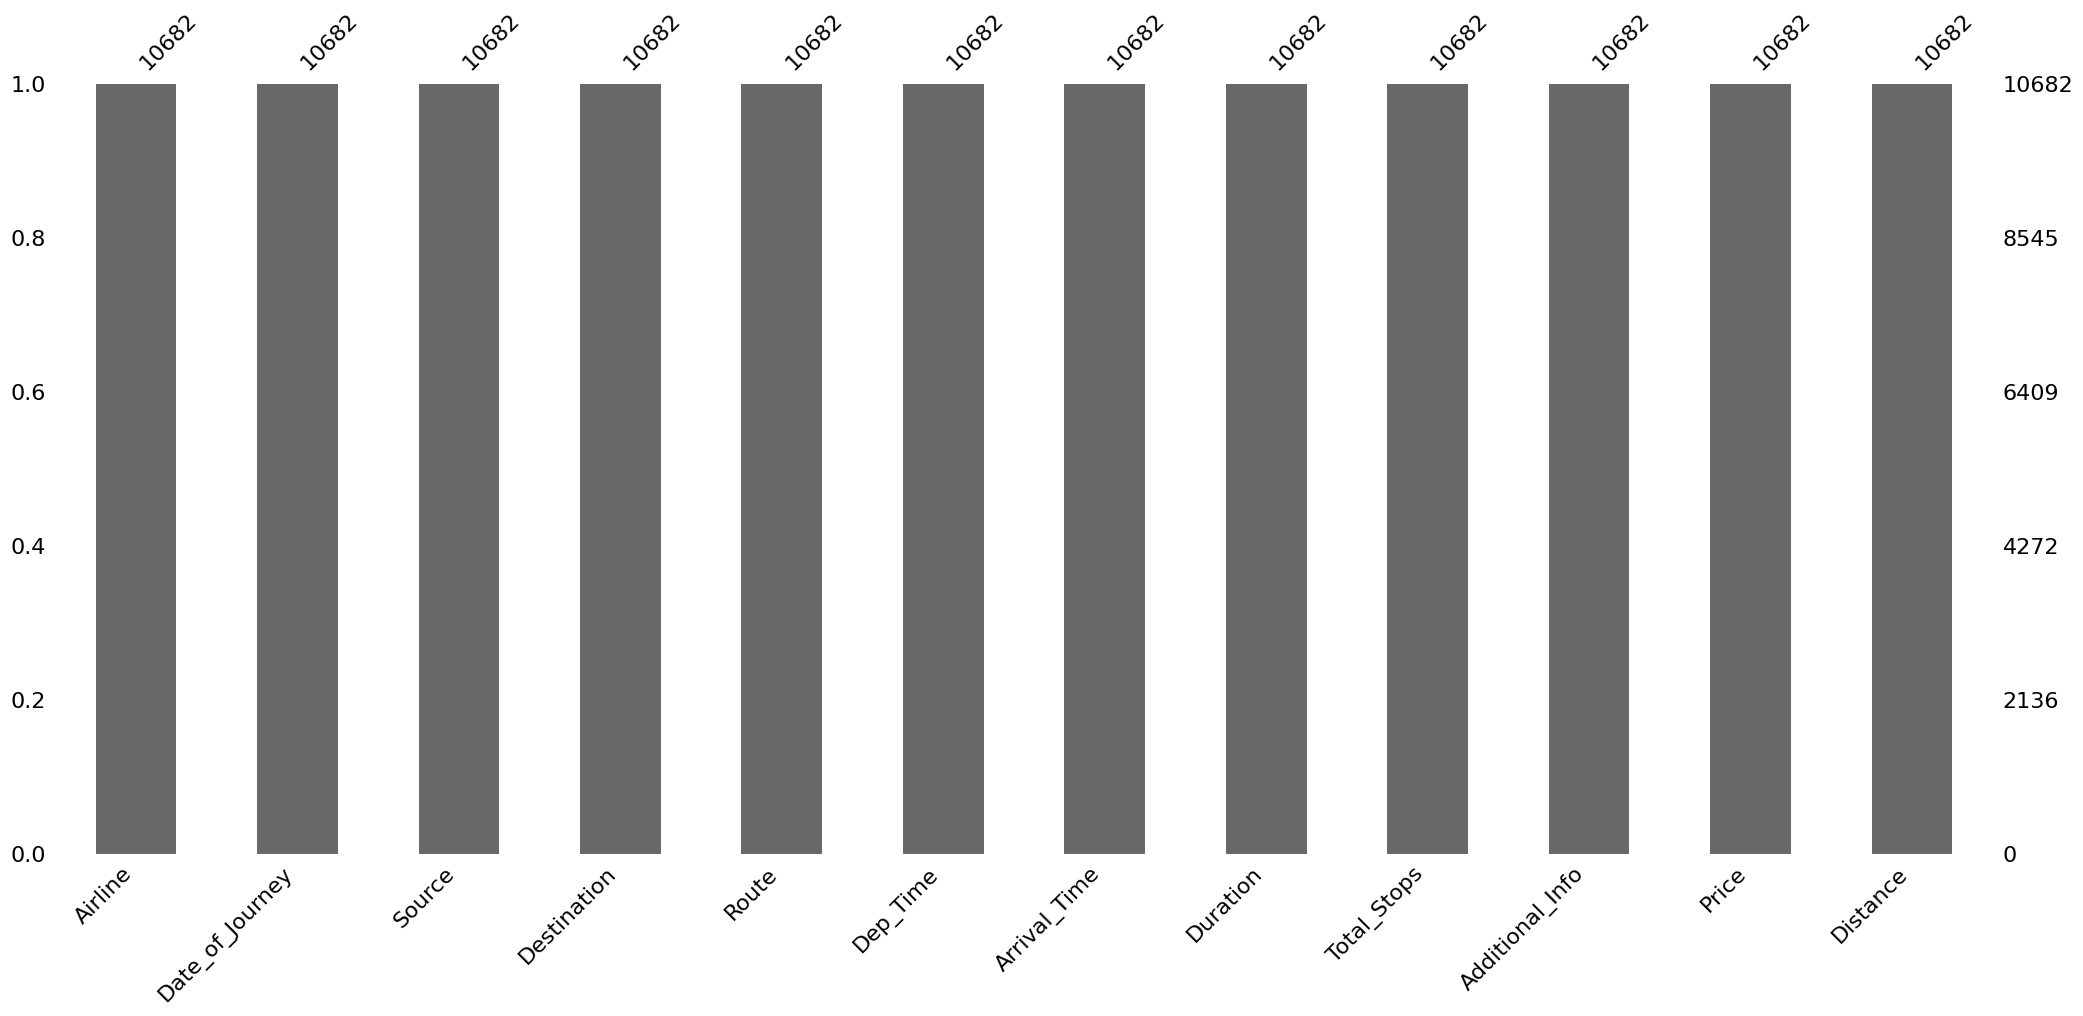

In [10]:
msno.bar(df)
plt.show

In [11]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Distance           0
dtype: int64

In [12]:
# data cleaning
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Distance            int64
dtype: object

In [13]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Distance'],
      dtype='object')

In [15]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Distance                    int64
dtype: object

In [17]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [18]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-01-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,1710,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-01-07 05:50:00,2024-01-07 13:15:00,7h 25m,2 stops,No info,7662,1841,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-01-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,2672,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-01-07 18:05:00,2024-01-07 23:30:00,5h 25m,1 stop,No info,6218,1876,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-01-07 16:50:00,2024-01-07 21:35:00,4h 45m,1 stop,No info,13302,1744,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU ? BLR,2024-01-07 09:00:00,2024-01-07 11:25:00,2h 25m,non-stop,No info,3873,1547,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,2024-01-07 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,1974,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR ? BOM ? DEL,2024-01-07 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270,1974,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,2024-01-07 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,1974,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL ? BOM ? COK,2024-01-07 11:25:00,2024-01-07 19:15:00,7h 50m,1 stop,No info,8625,2203,27,5


In [19]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [20]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2024-01-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,1710,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-01-07 05:50:00,2024-01-07 13:15:00,7h 25m,2 stops,No info,7662,1841,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-01-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,2672,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2024-01-07 18:05:00,2024-01-07 23:30:00,5h 25m,1 stop,No info,6218,1876,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2024-01-07 16:50:00,2024-01-07 21:35:00,4h 45m,1 stop,No info,13302,1744,1,3
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2024-01-07 09:00:00,2024-01-07 11:25:00,2h 25m,non-stop,No info,3873,1547,24,6
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2024-01-07 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,1974,12,3
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2024-01-07 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270,1974,1,3
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2024-01-07 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,1974,12,3
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,2024-01-07 11:25:00,2024-01-07 19:15:00,7h 50m,1 stop,No info,8625,2203,27,5


In [21]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [22]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [23]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [24]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,1710,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1841,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,2672,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,1876,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1744,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873,1547,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,15h 30m,1 stop,In-flight meal not included,11087,1974,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,21h 5m,1 stop,No info,22270,1974,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,25h 30m,1 stop,In-flight meal not included,11087,1974,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,7h 50m,1 stop,No info,8625,2203,27,5,11,25,19,15


In [25]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [26]:
df['Duration']=duration

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,1710,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1841,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,2672,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,1876,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1744,1,3,16,50,21,35


In [28]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [29]:
df['dur_hour']=df['Duration'].apply(hour)

In [30]:
df['dur_min']=df['Duration'].apply(minutes)

In [31]:
df.head(10)



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,1710,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1841,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,2672,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,1876,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1744,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873,1547,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,15h 30m,1 stop,In-flight meal not included,11087,1974,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,21h 5m,1 stop,No info,22270,1974,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,25h 30m,1 stop,In-flight meal not included,11087,1974,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,7h 50m,1 stop,No info,8625,2203,27,5,11,25,19,15,7,50


<Axes: xlabel='Airline', ylabel='Price'>

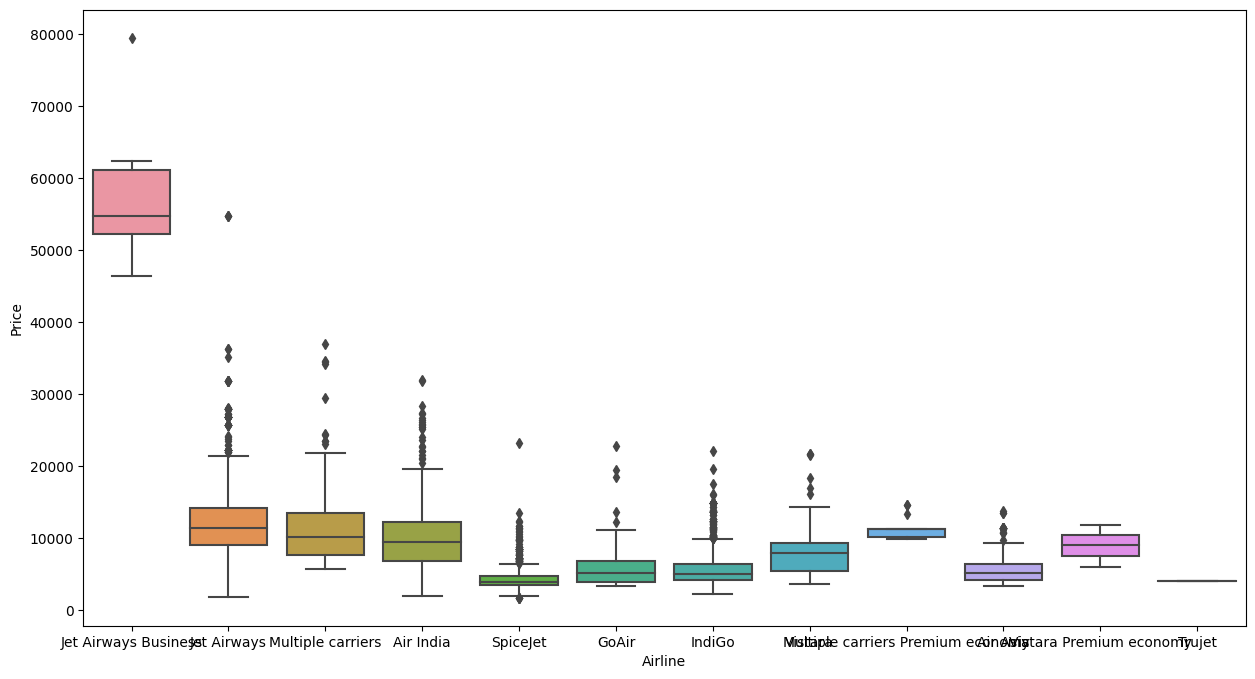

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Destination', ylabel='Price'>

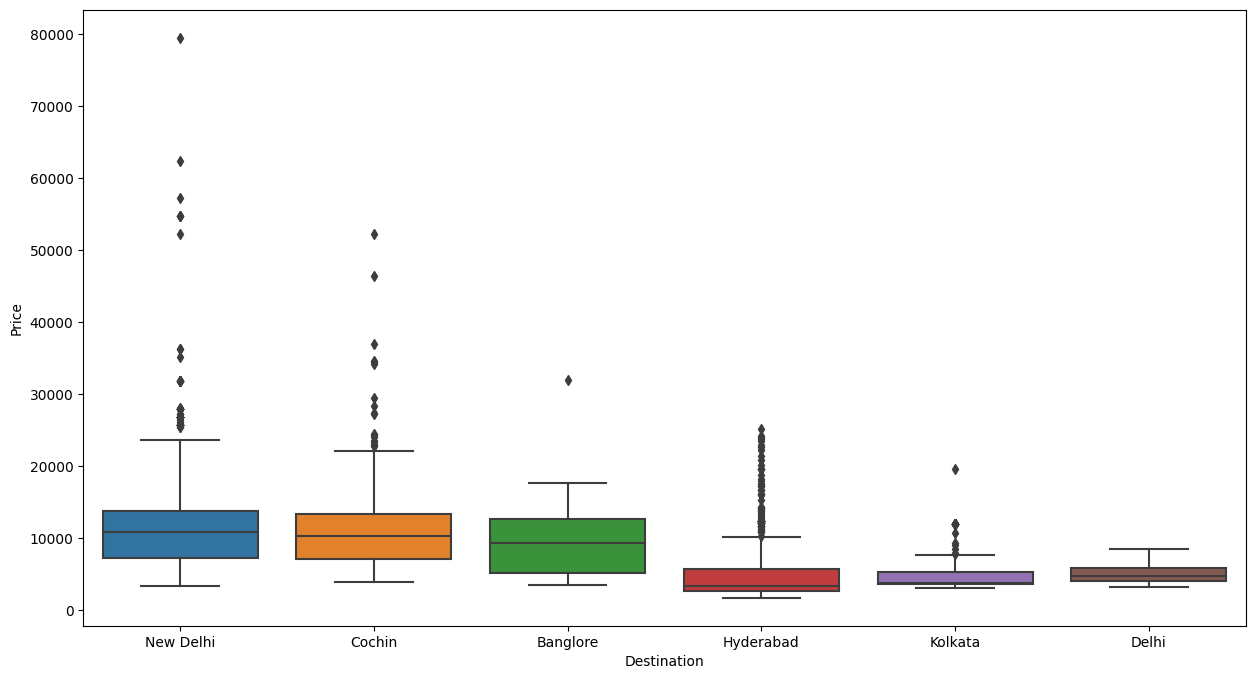

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='journey_day', ylabel='Price'>

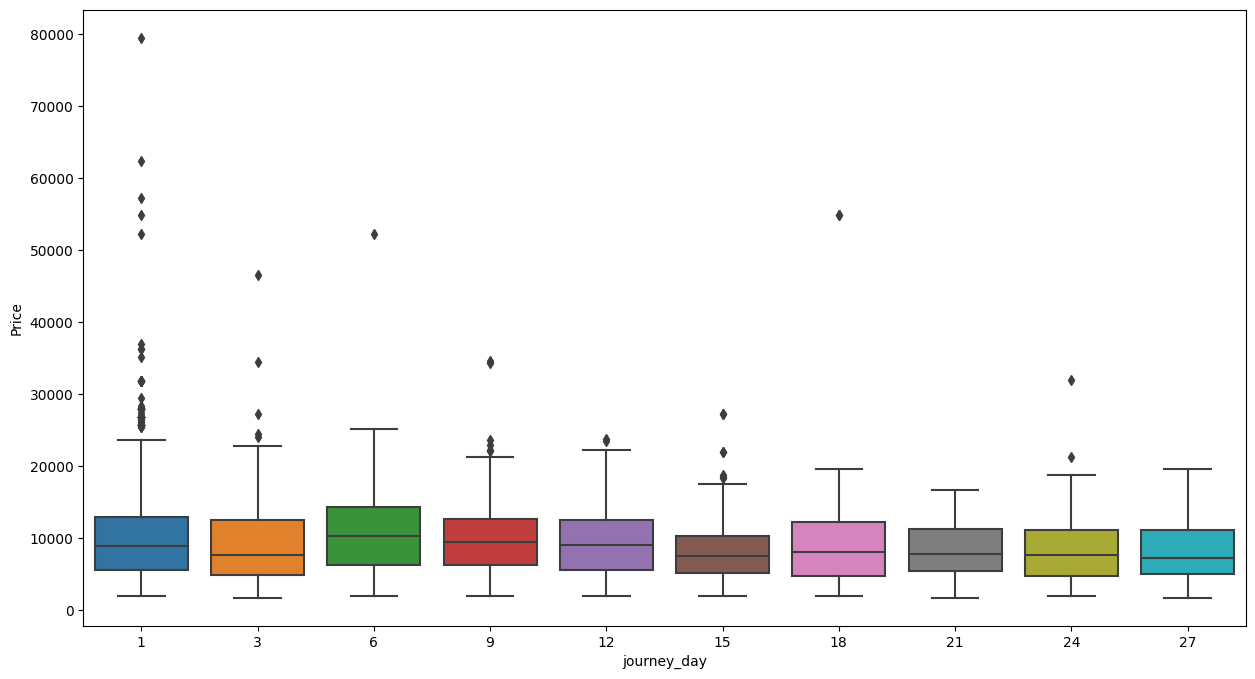

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='journey_day',y='Price',data=df.sort_values('Price',ascending=False))

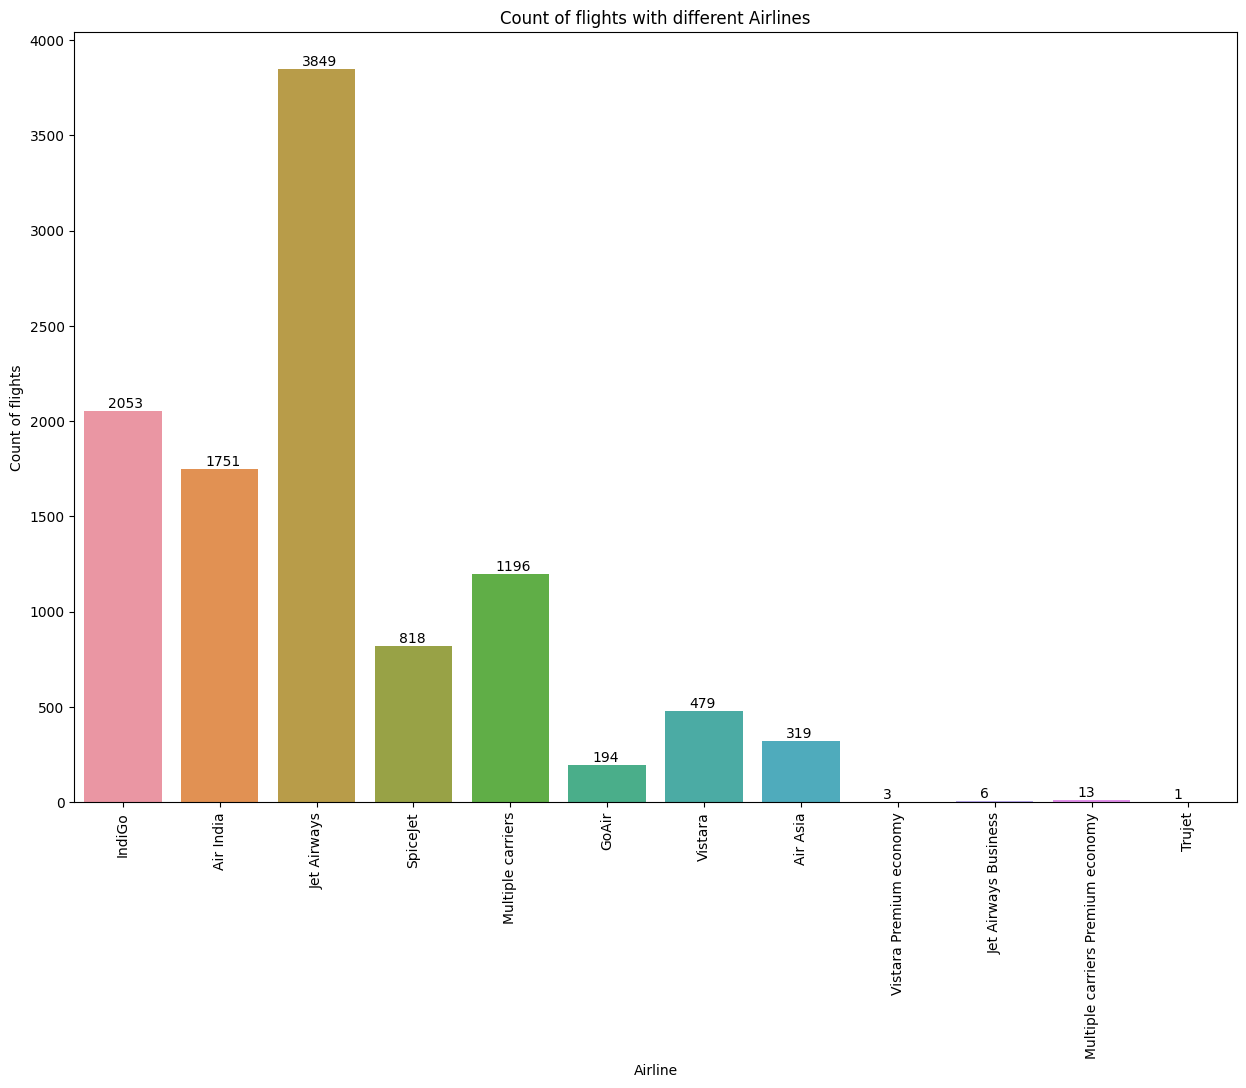

In [35]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

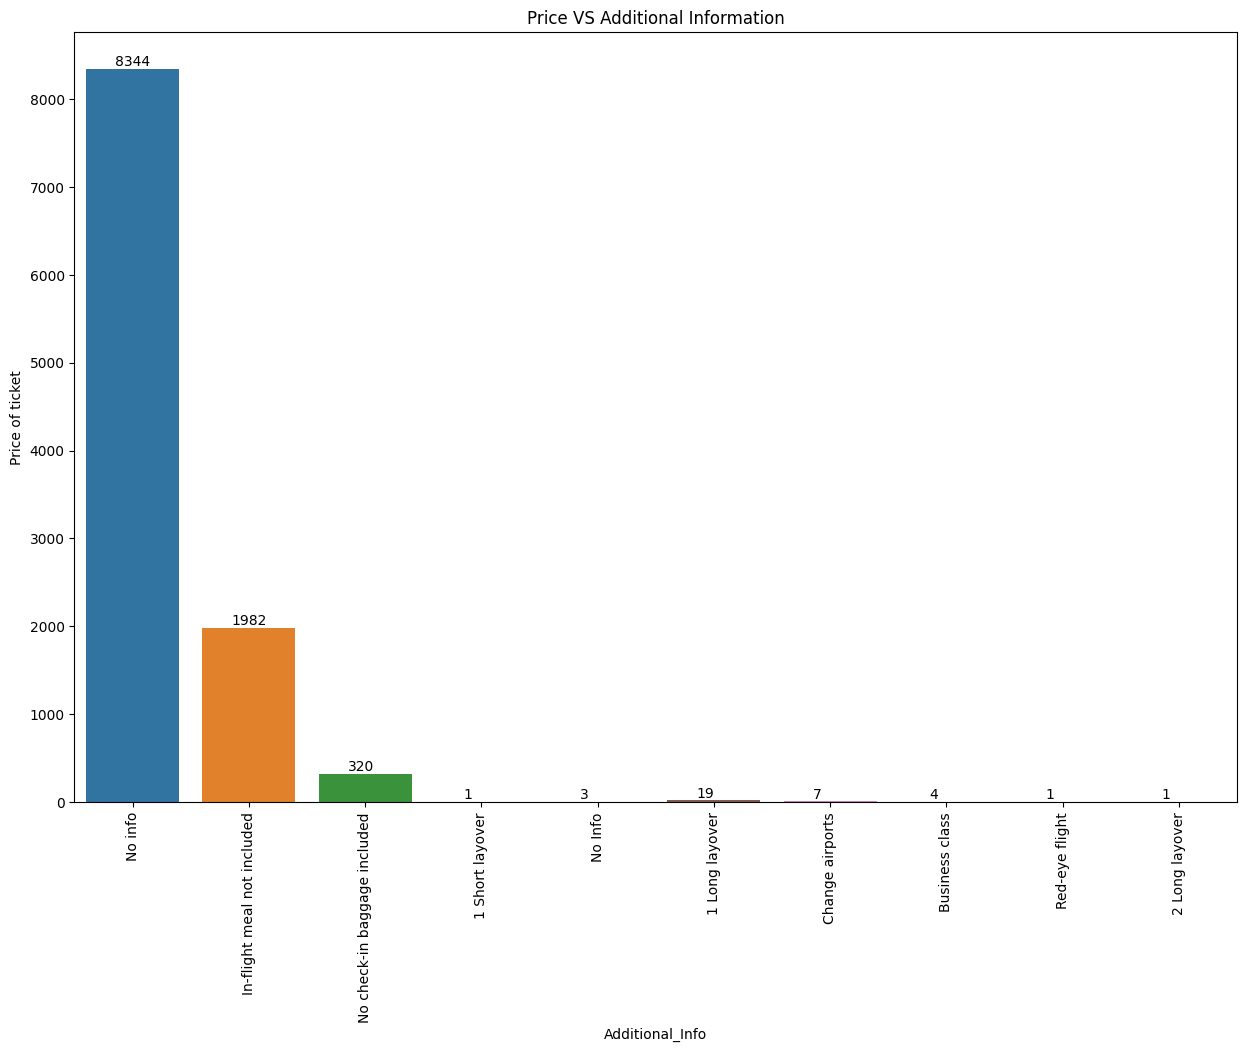

In [36]:


plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
ax=sns.countplot(x = 'Additional_Info', data =df)
plt.xlabel('Additional_Info')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [37]:
drop_col(df,'Duration')

<Axes: xlabel='Total_Stops', ylabel='Price'>

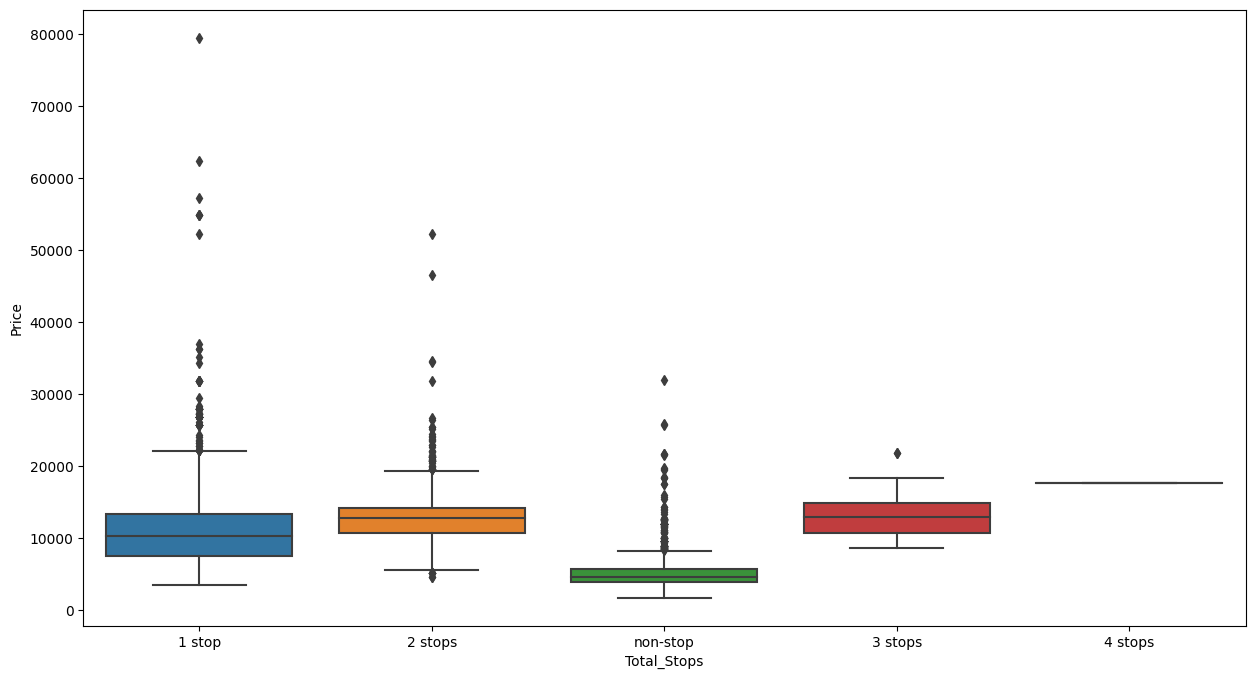

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Source', ylabel='Price'>

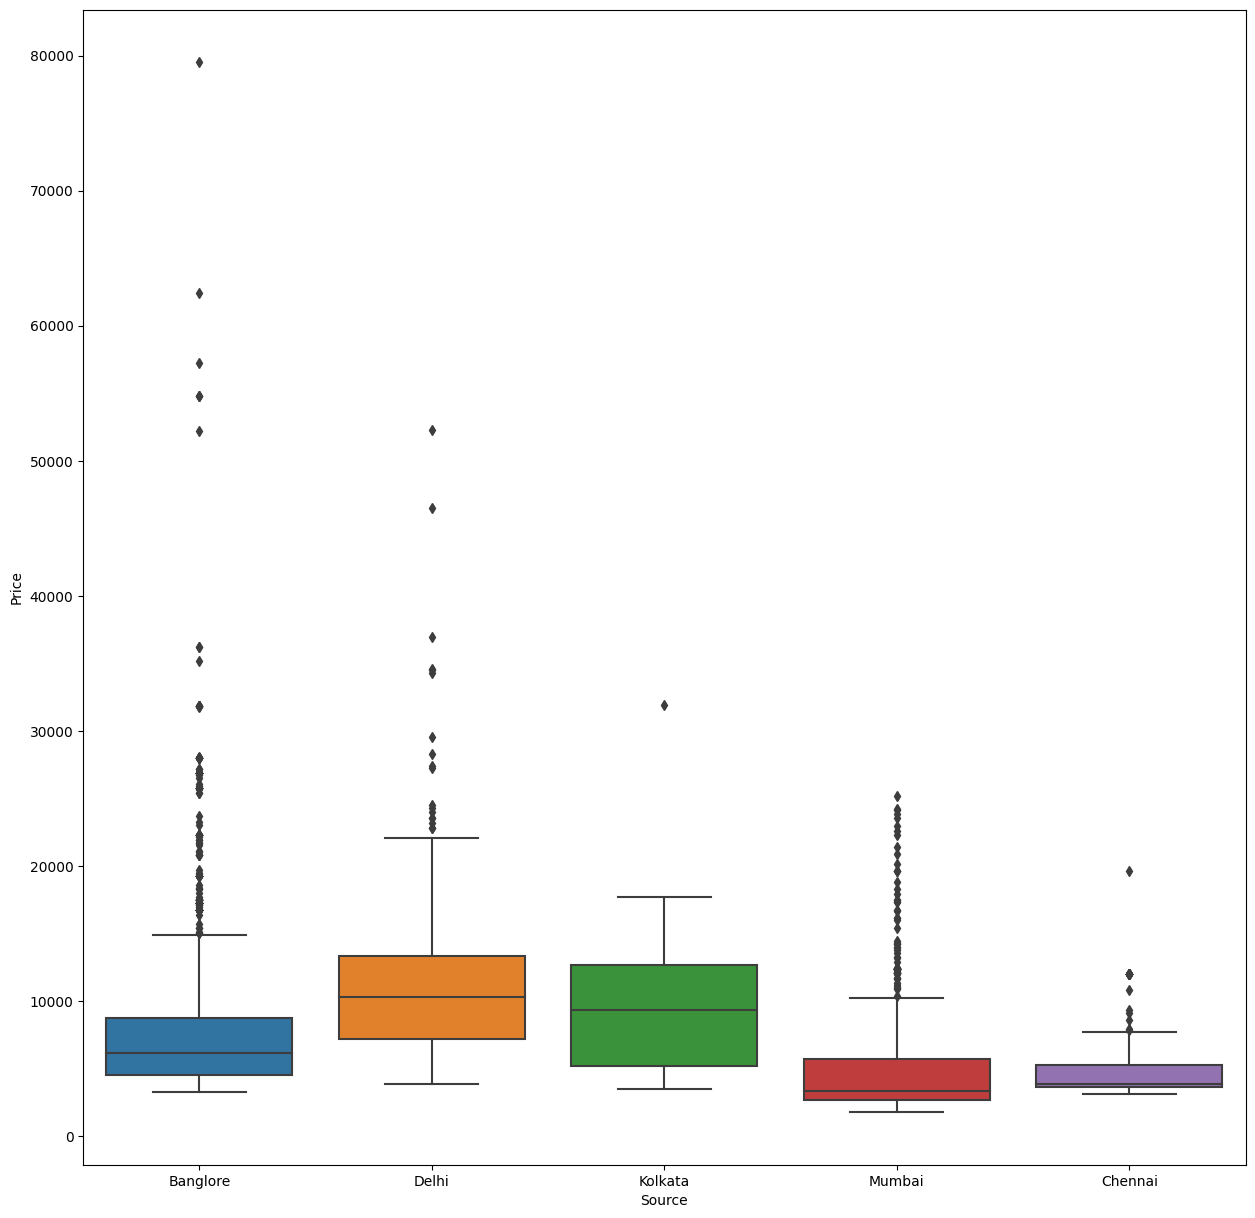

In [39]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='journey_month', ylabel='Price'>

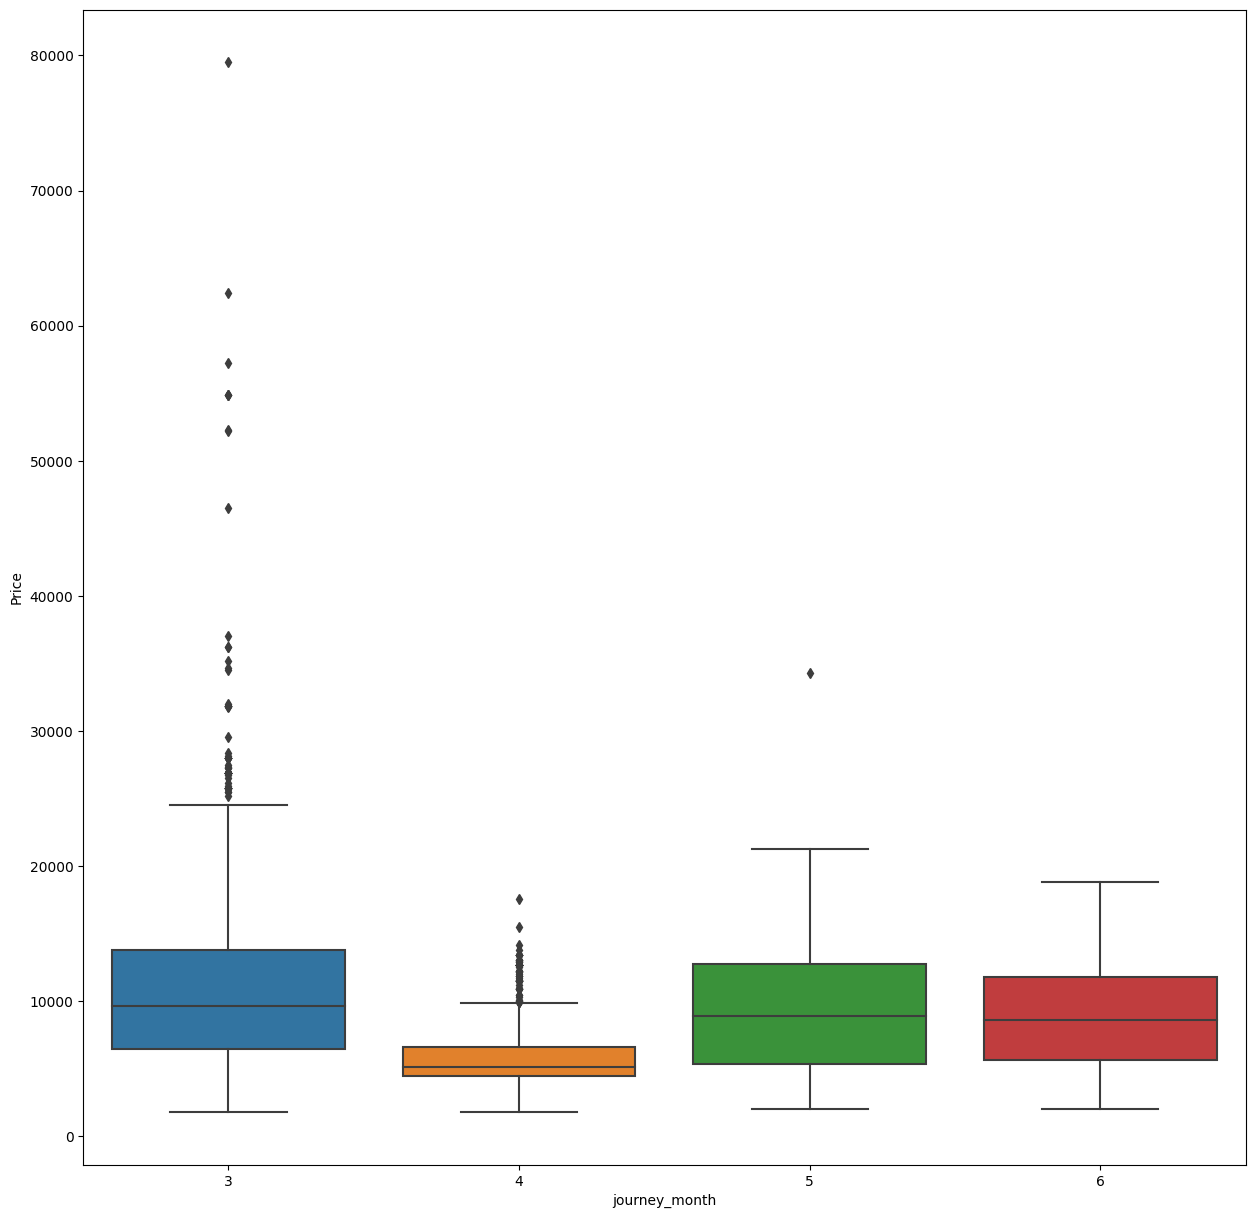

In [40]:
plt.figure(figsize=(15,15))
sns.boxplot(x='journey_month',y='Price',data=df.sort_values('Price',ascending=False))

In [41]:
# plt.figure(figsize = (15, 10))
# plt.title('Price VS Departure Time')
# ax=sns.countplot(x = 'dep_m', data =df)
# plt.xlabel('dep_m')
# plt.ylabel('Price')
# plt.xticks(rotation = 90)
# for p in ax.patches:
#     ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
#                     color= 'black')

<Axes: xlabel='journey_day', ylabel='Price'>

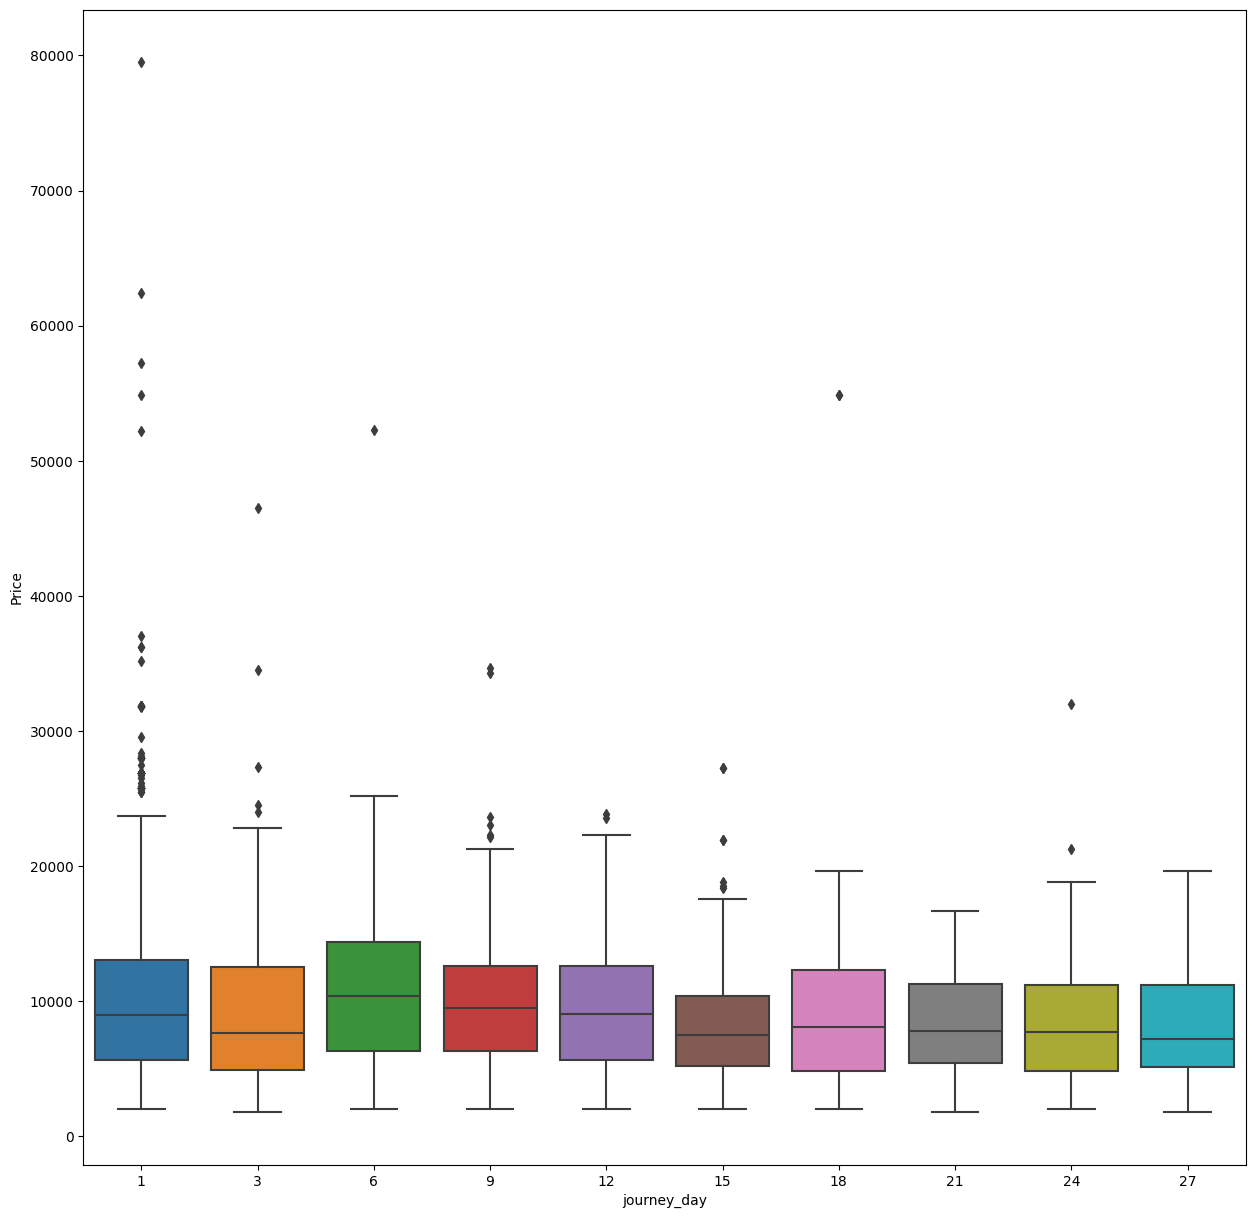

In [42]:
plt.figure(figsize=(15,15))
sns.boxplot(x='journey_day',y='Price',data=df.sort_values('Price',ascending=False))

In [43]:
# df.plot.hexbin(x='duration_m',y='Price',gridsize=15)


In [44]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Distance              int64
journey_day           int32
journey_month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour             object
dur_min              object
dtype: object

In [45]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [46]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Distance              int64
journey_day           int32
journey_month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour              int64
dur_min               int64
dtype: object

In [47]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df.Airline.values)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,1710,24,3,22,20,1,10,2,50
1,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1841,1,5,5,50,13,15,7,25
2,4,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,2672,9,6,9,25,4,25,19,0
3,3,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,1876,12,5,18,5,23,30,5,25
4,3,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1744,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,1547,9,4,19,55,22,25,2,30
10678,1,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,1547,27,4,20,45,23,20,2,35
10679,4,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,1710,27,4,8,20,11,20,3,0
10680,10,Banglore,New Delhi,BLR ? DEL,non-stop,No info,12648,1710,1,3,11,30,14,10,2,40


In [49]:
df['Source'] = le.fit_transform(df.Source.values)

In [50]:
df['Destination'] = le.fit_transform(df.Destination.values)

In [51]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)
# data_corr

In [52]:
duration_h=list(df['dur_hour'])
duration_m=list(df['dur_min'])
for i in range(len(duration_m)):
    duration_m[i]=duration_h[i]*60 + duration_m[i]
df['duration_m']=duration_m

df.drop('dur_hour', axis=1, inplace=True)
df.drop('dur_min', axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_m
0,3,0,5,BLR ? DEL,non-stop,No info,3897,1710,24,3,22,20,1,10,170
1,1,3,0,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1841,1,5,5,50,13,15,445
2,4,2,1,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,2672,9,6,9,25,4,25,1140
3,3,3,0,CCU ? NAG ? BLR,1 stop,No info,6218,1876,12,5,18,5,23,30,325
4,3,0,5,BLR ? NAG ? DEL,1 stop,No info,13302,1744,1,3,16,50,21,35,285


In [53]:
dep_h=list(df['Dep_Time_hour'])
dep_m=list(df['Dep_Time_min'])
for i in range(len(dep_m)):
    dep_m[i]=dep_h[i]*60 + dep_m[i]
df['dep_m']=dep_m

df.drop('Dep_Time_hour', axis=1, inplace=True)
df.drop('Dep_Time_min', axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,duration_m,dep_m
0,3,0,5,BLR ? DEL,non-stop,No info,3897,1710,24,3,1,10,170,1340
1,1,3,0,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1841,1,5,13,15,445,350
2,4,2,1,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,2672,9,6,4,25,1140,565
3,3,3,0,CCU ? NAG ? BLR,1 stop,No info,6218,1876,12,5,23,30,325,1085
4,3,0,5,BLR ? NAG ? DEL,1 stop,No info,13302,1744,1,3,21,35,285,1010


In [54]:
arr_h=list(df['Arrival_Time_hour'])
arr_m=list(df['Arrival_Time_min'])
for i in range(len(arr_m)):
    arr_m[i]=arr_h[i]*60 + arr_m[i]
df['arr_m']=arr_m

df.drop('Arrival_Time_min', axis=1, inplace=True)
df.drop('Arrival_Time_hour', axis=1, inplace=True)

df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m
0,3,0,5,BLR ? DEL,non-stop,No info,3897,1710,24,3,170,1340,70
1,1,3,0,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1841,1,5,445,350,795
2,4,2,1,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,2672,9,6,1140,565,265
3,3,3,0,CCU ? NAG ? BLR,1 stop,No info,6218,1876,12,5,325,1085,1410
4,3,0,5,BLR ? NAG ? DEL,1 stop,No info,13302,1744,1,3,285,1010,1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,CCU ? BLR,non-stop,No info,4107,1547,9,4,150,1195,1345
10678,1,3,0,CCU ? BLR,non-stop,No info,4145,1547,27,4,155,1245,1400
10679,4,0,2,BLR ? DEL,non-stop,No info,7229,1710,27,4,180,500,680
10680,10,0,5,BLR ? DEL,non-stop,No info,12648,1710,1,3,160,690,850


In [55]:
total_stops=list(df['Total_Stops'])

for i in range(len(total_stops)):
    if(total_stops[i]=='non-stop'):
        total_stops[i]=0
    if(total_stops[i]=='1 stop'):
        total_stops[i]=1
    if(total_stops[i]=='2 stop'):
        total_stops[i]=2
    if(total_stops[i]=='3 stop'):
        total_stops[i]=3
    if(total_stops[i]=='4 stop'):
        total_stops[i]=4
df['tot_stop']=total_stops
df.drop('Total_Stops', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m,tot_stop
0,3,0,5,BLR ? DEL,No info,3897,1710,24,3,170,1340,70,0
1,1,3,0,CCU ? IXR ? BBI ? BLR,No info,7662,1841,1,5,445,350,795,2 stops
2,4,2,1,DEL ? LKO ? BOM ? COK,No info,13882,2672,9,6,1140,565,265,2 stops
3,3,3,0,CCU ? NAG ? BLR,No info,6218,1876,12,5,325,1085,1410,1
4,3,0,5,BLR ? NAG ? DEL,No info,13302,1744,1,3,285,1010,1295,1


In [56]:
total_stops=list(df['tot_stop'])

for i in range(len(total_stops)):
    if(total_stops[i]==0):
        total_stops[i]=0
    if(total_stops[i]==1):
        total_stops[i]=1
    if(total_stops[i]=='2 stops'):
        total_stops[i]=2
    if(total_stops[i]=='3 stops'):
        total_stops[i]=3
    if(total_stops[i]=='4 stops'):
        total_stops[i]=4
df['stop_count']=total_stops
df.drop('tot_stop', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR ? DEL,No info,3897,1710,24,3,170,1340,70,0
1,1,3,0,CCU ? IXR ? BBI ? BLR,No info,7662,1841,1,5,445,350,795,2
2,4,2,1,DEL ? LKO ? BOM ? COK,No info,13882,2672,9,6,1140,565,265,2
3,3,3,0,CCU ? NAG ? BLR,No info,6218,1876,12,5,325,1085,1410,1
4,3,0,5,BLR ? NAG ? DEL,No info,13302,1744,1,3,285,1010,1295,1


In [57]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [58]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,10))
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Additional_Info'] = le.fit_transform(df.Additional_Info.values)
df

,Airline,Source,Destination,Route,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR ? DEL,8,3897,1710,24,3,170,1340,70,0
1,1,3,0,CCU ? IXR ? BBI ? BLR,8,7662,1841,1,5,445,350,795,2
2,4,2,1,DEL ? LKO ? BOM ? COK,8,13882,2672,9,6,1140,565,265,2
3,3,3,0,CCU ? NAG ? BLR,8,6218,1876,12,5,325,1085,1410,1
4,3,0,5,BLR ? NAG ? DEL,8,13302,1744,1,3,285,1010,1295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,CCU ? BLR,8,4107,1547,9,4,150,1195,1345,0
10678,1,3,0,CCU ? BLR,8,4145,1547,27,4,155,1245,1400,0
10679,4,0,2,BLR ? DEL,8,7229,1710,27,4,180,500,680,0
10680,10,0,5,BLR ? DEL,8,12648,1710,1,3,160,690,850,0


In [60]:
# add_info=list(df['Additional_Info'])
 
# for i in range(len(add_info)):
#     if(add_info[i]==7):
#         add_info[i]=2
#     if(add_info[i]==8):
#         add_info[i]=1
#     if(add_info[i]==5):
#         add_info[i]=3
# df['add_info']=add_info
# df.drop('Additional_Info', axis=1, inplace=True)

In [61]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [62]:
df.dtypes


Airline             int64
Source              int64
Destination         int64
Route              object
Additional_Info     int64
Price               int64
Distance            int64
journey_day         int32
journey_month       int32
duration_m          int64
dep_m               int64
arr_m               int64
stop_count          int64
dtype: object

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

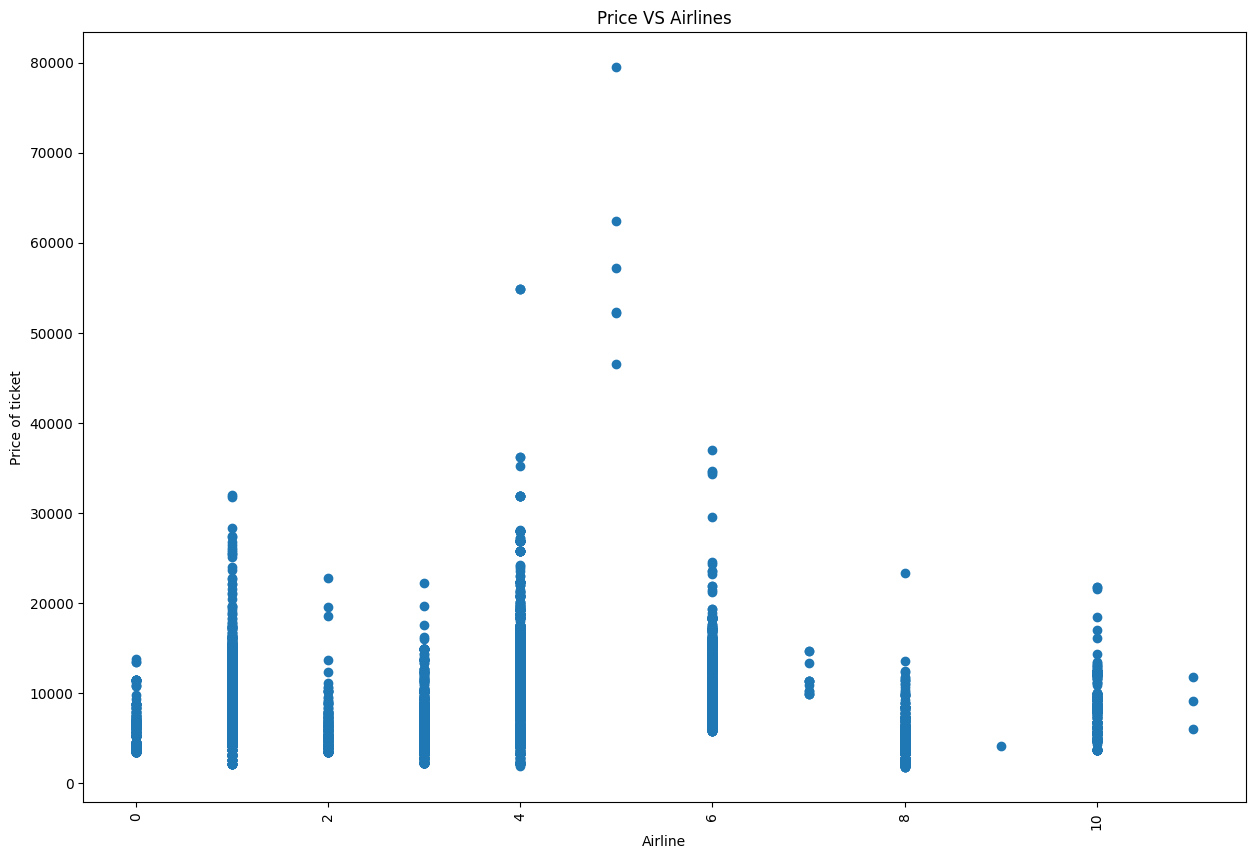

In [63]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [64]:
df['Airline'].value_counts()


Airline
4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: count, dtype: int64

In [65]:
# Airline
df["Airline"].replace({7:2,5:2,11:2,9:2}, inplace=True)

In [66]:
df['Airline'].value_counts()


Airline
4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      217
Name: count, dtype: int64

In [67]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,10))
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# plt.show()

In [68]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [69]:
df["Additional_Info"].value_counts()


Additional_Info
8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: count, dtype: int64

In [70]:
# Additional_Info
df["Additional_Info"].replace({2:0,9:0,1:0,6:0,3:0,4:0}, inplace=True)

In [71]:
df["Additional_Info"].value_counts()


Additional_Info
8    8344
5    1982
7     320
0      36
Name: count, dtype: int64

In [72]:
df["Additional_Info"].replace({0:7}, inplace=True)

In [73]:
df["Additional_Info"].value_counts()


Additional_Info
8    8344
5    1982
7     356
Name: count, dtype: int64

In [74]:
# add_info=list(df['Additional_Info'])
 
# for i in range(len(add_info)):
#     if(add_info[i]==7):
#         add_info[i]=2
#     if(add_info[i]==8):
#         add_info[i]=1
#     if(add_info[i]==5):
#         add_info[i]=3
# df['add_info']=add_info
# df.drop('Additional_Info', axis=1, inplace=True)

In [75]:
# df["Additional_Info"].value_counts()


In [76]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Additional_Info'] = le.fit_transform(df.Additional_Info.values)
df

,Airline,Source,Destination,Route,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR ? DEL,2,3897,1710,24,3,170,1340,70,0
1,1,3,0,CCU ? IXR ? BBI ? BLR,2,7662,1841,1,5,445,350,795,2
2,4,2,1,DEL ? LKO ? BOM ? COK,2,13882,2672,9,6,1140,565,265,2
3,3,3,0,CCU ? NAG ? BLR,2,6218,1876,12,5,325,1085,1410,1
4,3,0,5,BLR ? NAG ? DEL,2,13302,1744,1,3,285,1010,1295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,CCU ? BLR,2,4107,1547,9,4,150,1195,1345,0
10678,1,3,0,CCU ? BLR,2,4145,1547,27,4,155,1245,1400,0
10679,4,0,2,BLR ? DEL,2,7229,1710,27,4,180,500,680,0
10680,10,0,5,BLR ? DEL,2,12648,1710,1,3,160,690,850,0


In [78]:
# add_info=list(df['Additional_Info'])
 
# for i in range(len(add_info)):
#     if(add_info[i]==7):
#         add_info[i]=2
#     if(add_info[i]==8):
#         add_info[i]=1
#     if(add_info[i]==5):
#         add_info[i]=3
# df['add_info']=add_info
# df.drop('Additional_Info', axis=1, inplace=True)

In [79]:
# df["Additional_Info"].value_counts()

In [80]:
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR ? DEL,2,3897,1710,24,3,170,1340,70,0
1,1,3,0,CCU ? IXR ? BBI ? BLR,2,7662,1841,1,5,445,350,795,2
2,4,2,1,DEL ? LKO ? BOM ? COK,2,13882,2672,9,6,1140,565,265,2
3,3,3,0,CCU ? NAG ? BLR,2,6218,1876,12,5,325,1085,1410,1
4,3,0,5,BLR ? NAG ? DEL,2,13302,1744,1,3,285,1010,1295,1


In [81]:
df.drop('Route', axis=1, inplace=True)

In [82]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Distance,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,2,3897,1710,24,3,170,1340,70,0
1,1,3,0,2,7662,1841,1,5,445,350,795,2
2,4,2,1,2,13882,2672,9,6,1140,565,265,2
3,3,3,0,2,6218,1876,12,5,325,1085,1410,1
4,3,0,5,2,13302,1744,1,3,285,1010,1295,1


In [83]:
# Let's Analyze Destination Column also
df['Destination'].value_counts()

Destination
1    4536
0    2871
2    1265
5     932
3     697
4     381
Name: count, dtype: int64

In [84]:
df.dtypes

Airline            int64
Source             int64
Destination        int64
Additional_Info    int64
Price              int64
Distance           int64
journey_day        int32
journey_month      int32
duration_m         int64
dep_m              int64
arr_m              int64
stop_count         int64
dtype: object

In [85]:
X,Y = df.iloc[:,1:].values, df.iloc[0,0:].values
X,Y

(array([[   0,    5,    2, ..., 1340,   70,    0],
        [   3,    0,    2, ...,  350,  795,    2],
        [   2,    1,    2, ...,  565,  265,    2],
        ...,
        [   0,    2,    2, ...,  500,  680,    0],
        [   0,    5,    2, ...,  690,  850,    0],
        [   2,    1,    2, ...,  655, 1155,    2]]),
 array([   3,    0,    5,    2, 3897, 1710,   24,    3,  170, 1340,   70,
           0]))

In [86]:
X,Y

(array([[   0,    5,    2, ..., 1340,   70,    0],
        [   3,    0,    2, ...,  350,  795,    2],
        [   2,    1,    2, ...,  565,  265,    2],
        ...,
        [   0,    2,    2, ...,  500,  680,    0],
        [   0,    5,    2, ...,  690,  850,    0],
        [   2,    1,    2, ...,  655, 1155,    2]]),
 array([   3,    0,    5,    2, 3897, 1710,   24,    3,  170, 1340,   70,
           0]))

In [87]:
Y

array([   3,    0,    5,    2, 3897, 1710,   24,    3,  170, 1340,   70,
          0])

In [88]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [89]:
data_corr = df.corr()['Price'].sort_values(ascending=False)

data_corr

Price              1.000000
stop_count         0.603897
Distance           0.527185
duration_m         0.506480
arr_m              0.020901
Source             0.015999
dep_m              0.005468
Additional_Info   -0.008024
Airline           -0.048287
Destination       -0.071122
journey_month     -0.103643
journey_day       -0.153774
Name: Price, dtype: float64

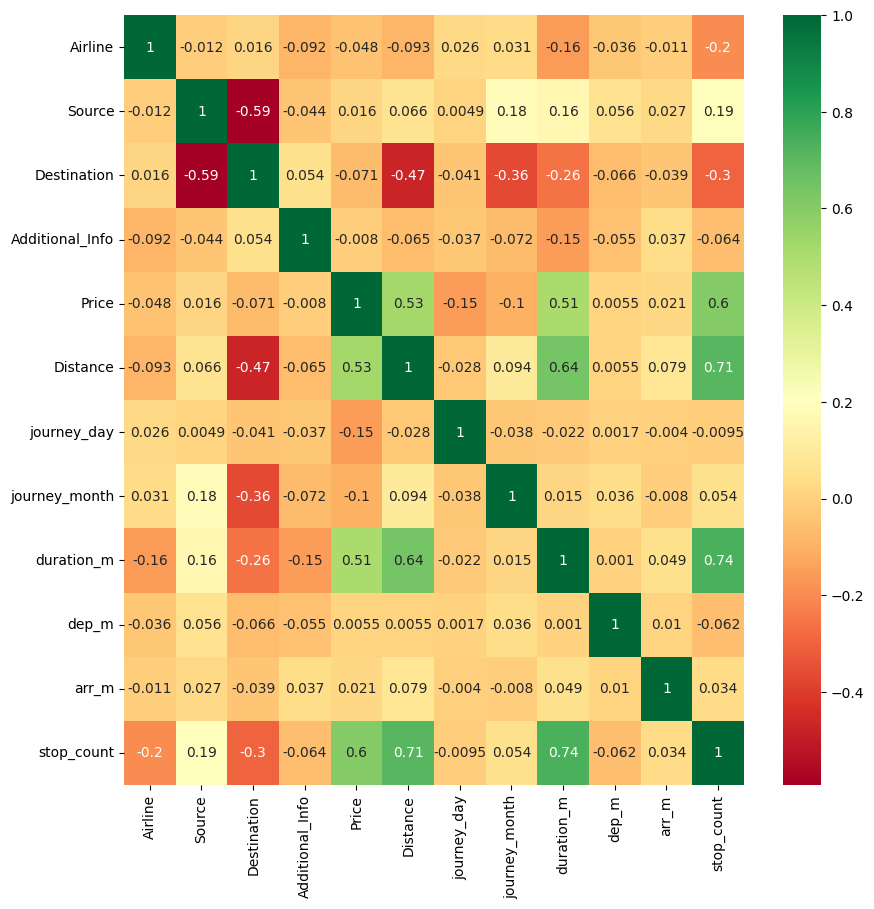

In [90]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [92]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,Y_train)
    print("Training score: {}".format(model.score(X_train,Y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(Y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(Y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(Y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(Y_test,predictions))))
     
    sns.distplot(Y_test-predictions)      
          

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9799896568339295
Predictions are: [14613.    5966.22  3596.46 ...  4819.45 14291.49  6899.49]


r2 score is: 0.8485359284261406
MAE:703.3781335029593
MSE:3270104.152862875
RMSE:1808.3429301055912


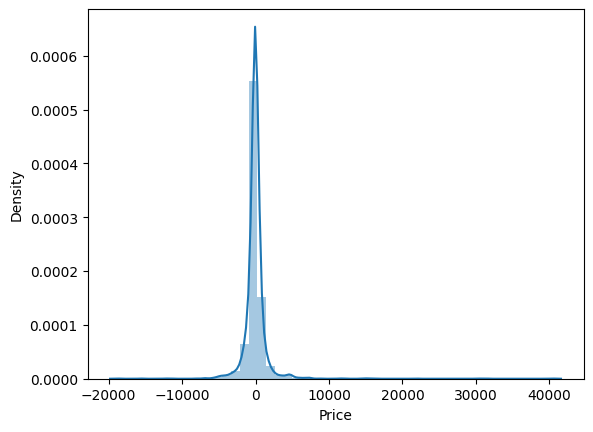

In [94]:

predict(RandomForestRegressor())


Model is: DecisionTreeClassifier()
Training score: 0.9846194997993848
Predictions are: [14781  5636  3597 ...  5170 14781  8238]


r2 score is: 0.6126655215158994
MAE:899.5666146645866
MSE:8362538.214352574
RMSE:2891.8053555439333


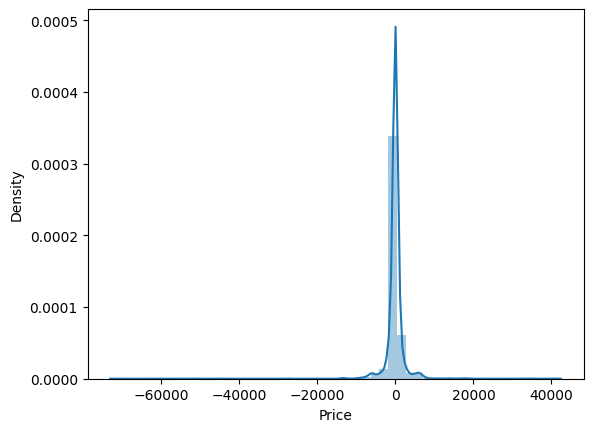

In [95]:
from sklearn.tree import DecisionTreeClassifier as DTC
predict(DTC())



In [96]:
from sklearn.linear_model import LogisticRegressionCV as LR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB



Model is: RandomForestClassifier()
Training score: 0.9844857563193794
Predictions are: [14781  5636  3597 ...  4565 13941  8238]


r2 score is: 0.6902269099959266
MAE:825.3622464898596
MSE:6687990.47550702
RMSE:2586.1149385723406


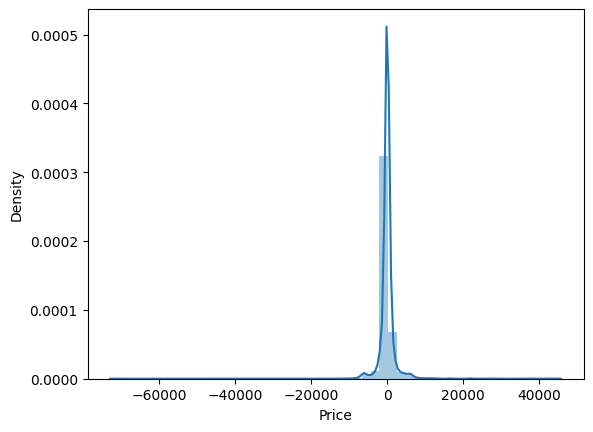

In [97]:
predict(RandomForestClassifier())

In [98]:
from xgboost import XGBRegressor


In [99]:
# xgb = XGBRegressor()
# xgb.fit(x_train,y_train)

# #The predicted data
# xgb_pred = xgb.predict(x_test)

# #The performance
# performance(xgb,x_train,y_train,xgb_pred,y_test)

Model is: GaussianNB()
Training score: 0.6483883910659355
Predictions are: [14781  6582  3597 ...  4565 14388  5775]


r2 score is: 0.6891164414920654
MAE:1055.8290171606864
MSE:6711965.452730109
RMSE:2590.7461189259957


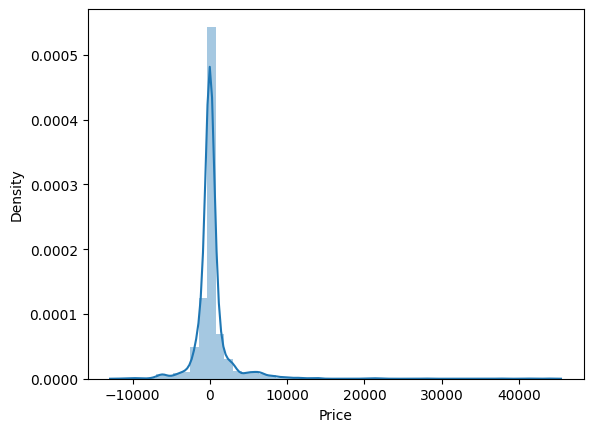

In [100]:
predict(GaussianNB())

Model is: LogisticRegression()
Training score: 0.0744951183629798
Predictions are: [10844 14781  3597 ...  6938 10262  4591]


r2 score is: 0.21904492362236272
MAE:2813.723868954758
MSE:16860793.532917317
RMSE:4106.189661099122


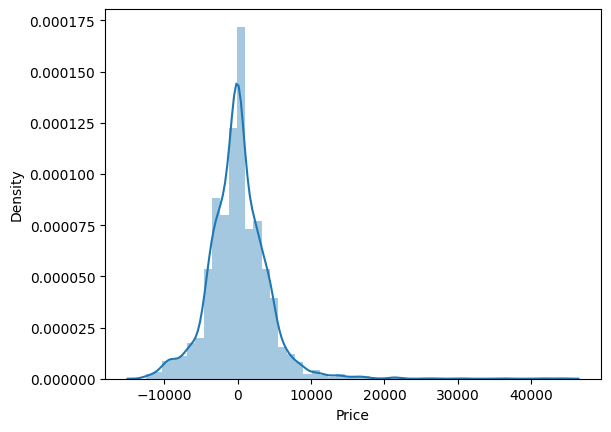

In [101]:
predict(LogisticRegression())


Model is: KNeighborsRegressor()
Training score: 0.7339089299331396
Predictions are: [13762.6  6164.8  8564.2 ...  5054.  10523.4  6718.4]


r2 score is: 0.573954013927462
MAE:1747.303026521061
MSE:9198318.346321372
RMSE:3032.872952551981


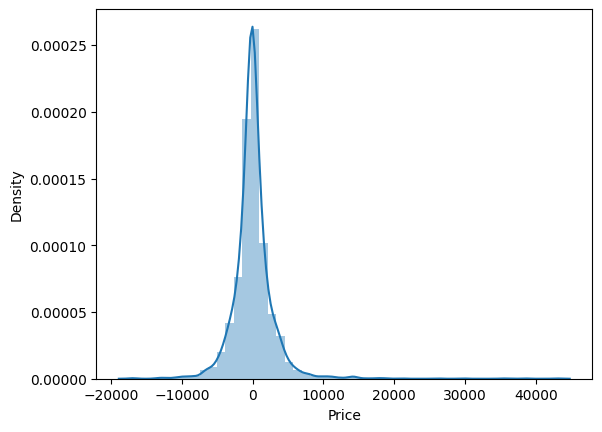

In [102]:
predict(KNeighborsRegressor())


Model is: DecisionTreeRegressor()
Training score: 0.9961187228702765
Predictions are: [14781.  5636.  3597. ...  4565. 13941.  6628.]


r2 score is: 0.6842958861732205
MAE:824.0508060322412
MSE:6816041.0780811235
RMSE:2610.754886633581


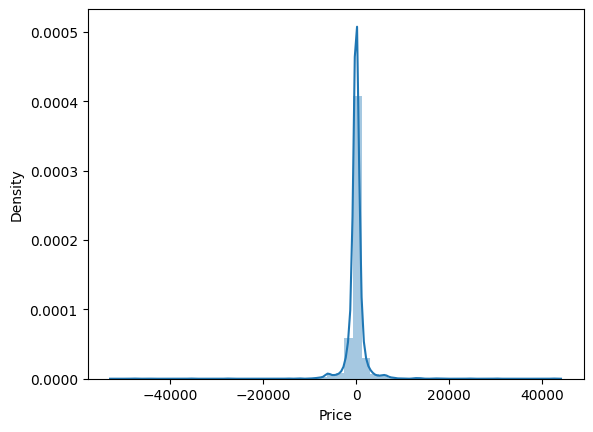

In [103]:
predict(DecisionTreeRegressor())


In [104]:
# from sklearn.model_selection import cross_validate, GridSearchCV

# model = XGBRegressor(objective='count:poisson')

# param = {'n_estimators' : [500, 700, 1000], 'learning_rate' : [0.1,0.2,0.3],'max_depth' : [5,6,7,8]}

# grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5)
# grid_search.fit(x_train, y_train)

In [ ]:
sns.pairplot(df)

In [ ]:
df.groupby('Airline')[['Price']].describe()

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
#3 hidden layer with 8 nodes
#activation is for actiovation function - here we mention what activation function we want to use
#solver is an optimizaer - use solver function to optimize weight and bias
#max_iter is for number of epocks
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,Y_pred))

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np
np.random.seed(7) #random seed for reproducibility 

In [ ]:
print('Trainig set score',mlp.score(X_train,Y_train))
print('Test set score',mlp.score(X_test,Y_test))

In [ ]:
df.head()


In [ ]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

In [ ]:
plot(df,'Price')

In [ ]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

In [ ]:
plot(df,'Price')


In [ ]:
predict(DecisionTreeRegressor())


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,Y_train)

# best parameter
rf_random.best_params_

In [ ]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(Y_test-prediction)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np
np.random.seed(7) #random seed for reproducibility 

In [ ]:
X.shape,Y.shape,X.head()

In [ ]:
import tensorflow as tf

In [ ]:
tf.reshape(Y,[10682,1])

In [ ]:
Y.shape

In [ ]:
# create Model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])


model.fit(X, Y, epochs=150, batch_size=10,verbose=2)


scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [ ]:
df

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
df.groupby('dep_m')[['Price']].min().plot(kind='line')


In [ ]:
df.groupby('dep_m')[['Price']].describe()


In [ ]:
sns.barplot(data=df,x='dep_m',y='Price',estimator=np.median)
plt.title("Departure Time")
plt.ylabel("Price of flight")
plt.xlabel(None)
plt.show()

In [ ]:
sns.barplot(data=df,x='arr_m',y='Price',estimator=np.median)
plt.title("Arrival Time")
plt.ylabel("Price of flight")
plt.xlabel(None)
plt.show()

###### 